<a href="https://colab.research.google.com/github/luciosjodin/AprendizajeAutomatico1/blob/master/TP1_AA1_Sj%C3%B6din_Lucio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TP1 AA1

**Sjödin Lucio**

## Indicaciones básicas

0) Debe usar este notebook como template para su entrega. Haga una copia y comience a completar las consignas.

1) Cada uno debe completar las consignas indicadas en este notebook.

2)
3) No pueden repetir el mismo dataset que ya haya definido un compañero.

4) copias explícitas de secciones enteras del trabajo de otro será penalizado disminuyendo su puntuación.

5) No se olvide de añadir las fuentes de inspiración de su código (blogs, prompts de chatgpt o similar).

6) Además de todo el código que agregue, es importante que sepa interpretarlo. Agregue texto explicativo en cada sección. Esto le ayudará al momento del coloquio / parcial

7) Revise las fecha límite de entrega de este trabajo

# ENTREGA

* En el foro destinado a la tarea debe postear al menos tres veces:
  - La primera vez para indicar el dataset elegido
  - Una segunda vez para postear su entrega
  - Una tercera vez para brindar feedback a alguien más en el foro.
  - Puede comentar más de un posteo de sus compañeros siempre y cuando el intercambio sea respetuoso y fructífero.
* Deben postear como solución un enlace a su notebook colab público y también un enlace al mismo notebook alojado en su repositorio GitHub.
* Debe sumar el enlace a un video donde muestre su solución y explique lo realizado. Duración máxima: 5 minutos. Puede grabarse a Ud. mismo usando una sesión de zoom y grabar localmente. Puede subir el video a su youtube personal como privado o Unlisted.
* Enlaces no accesibles o enlaces erróneos es igual a determinar que la tarea no ha sido entregada. Corrobore la viabilidad de los enlaces que postea.


#**Tarea: Aplicación de Regresión Lineal y Análisis de Importancia de Variables**  
**Objetivo**: Aplicar un modelo de regresión lineal a un dataset de su elección, evaluar su rendimiento e identificar las variables más relevantes para la predicción.

---

# **Instrucciones**:

#1. **Selección del Dataset**  
   - Elijan un dataset de UCI ML Repository del siguiente enlace: https://archive.ics.uci.edu/datasets/?Task=Regression&skip=0&take=10&sort=desc&orderBy=NumHits&search=  
   - Requisitos:  
     - Debe tener al menos 4 variables numéricas continuas (1 target, 3 o más features).  
     - Idealmente, que las features tengan distintas escalas o unidades ( no excluyente).
     - Revisar en el foro de la tarea que dicho dataset no haya sido ya elegido por otra persona.
     - Postee en el foro de la tarea el dataset que eligió. Continue al siguiente punto.  



## Resolución:

Para trabajar en este TP he seleccionado el dataset "Concrete_Data", que trata sobre los diferentes componentes del concreto y se puede analizar cómo afectan la fuerza compresiva del concreto, variable que será el target del modelo de regresión lineal

Importo la librería pandas y con la url del repositorio, descargo en el notebook el dataset "Concrete_Data"

In [14]:
import pandas as pd

url = 'https://github.com/luciosjodin/AprendizajeAutomatico1/raw/refs/heads/master/Concrete_Data.xls'

df = pd.read_excel(url)

df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075



## 2. **Análisis exploratorio (previo al modelado)**  
   - Describan las variables (media, distribución, outliers).  
   - Visualizen:  
     - Histogramas o boxplots para ver distribuciones.  
     - Gráficos de dispersión (scatterplots) entre features y target.  
   - **Pregunta clave**: ¿Qué relaciones lineales preliminares observan?  


## Resolución:

In [15]:
print('Información del df:')
df.info()
print('\nAnálisis estadístico del df: ')
df.describe()

Información del df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


Generación de los gráficos:

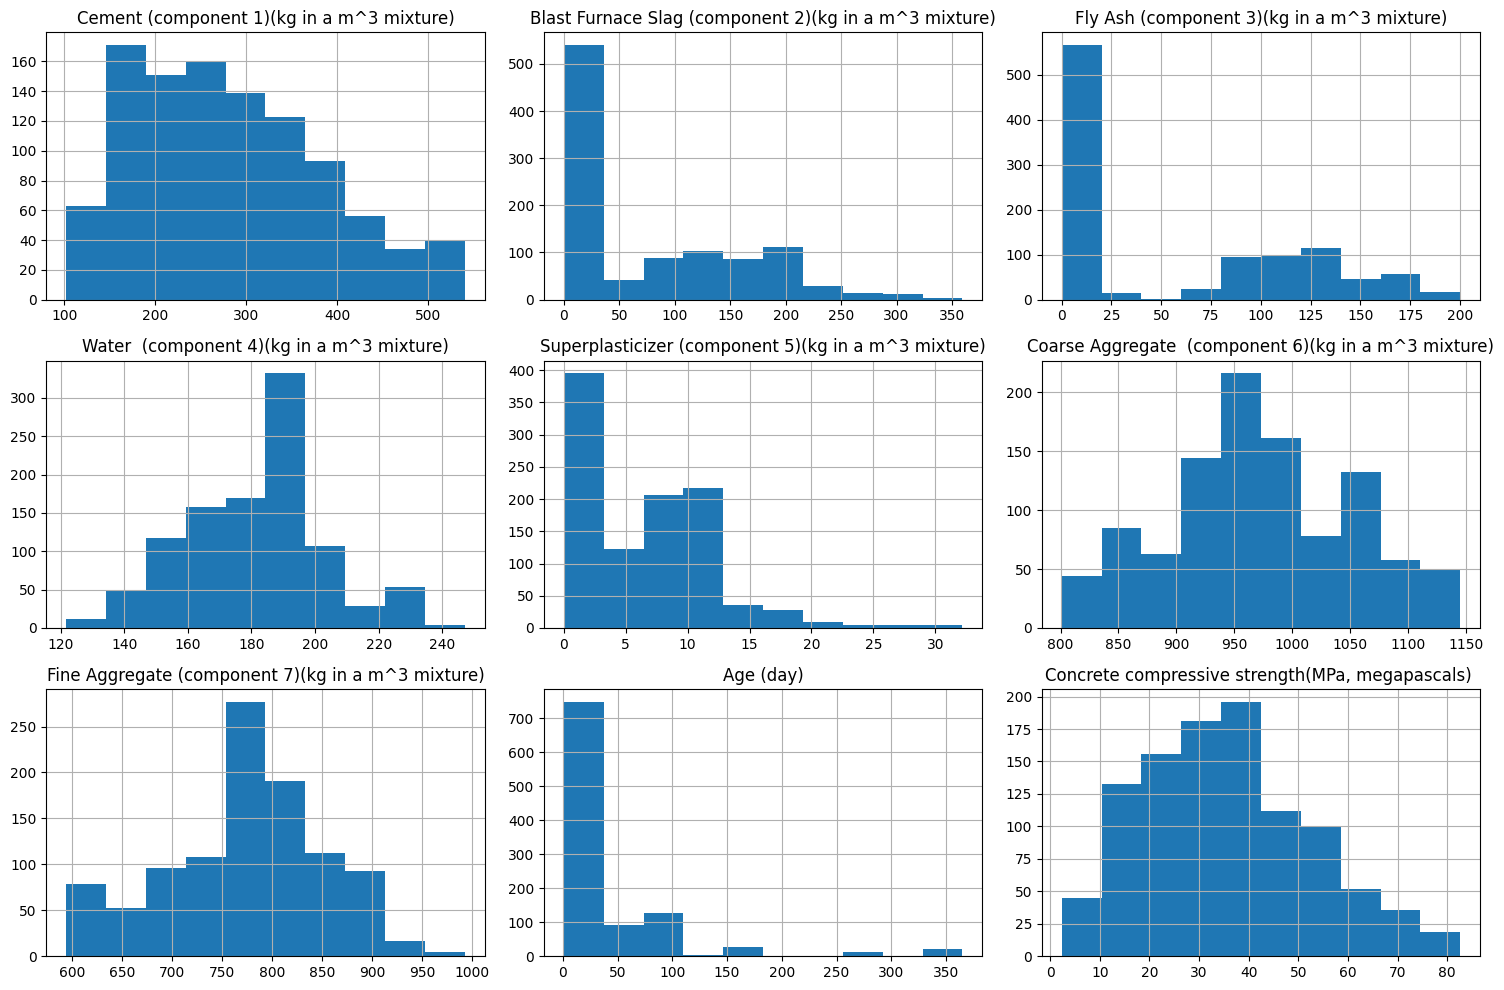

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

In [17]:
#Aquí ya defino de entrada el target, y las features
target = 'Concrete compressive strength(MPa, megapascals) '
features = df.columns.drop(target)

for feature in features:
    fig = px.scatter(df, x=feature, y=target,
                     title=f'{feature} vs {target}',
                     trendline="ols")
    fig.show()

**Análisis Exploratorio de Datos**

Con base en el resultado del df.describe, los histogramas, boxplots y scatterplots podemos analizar por cada variable (componente):
*   **Cement (component 1)**:
    *   **Media y Distribución:** La media es de aproximadamente 281 kg/m³. El histograma muestra una distribución que tiende a ser bimodal o con dos picos, indicando quizás dos rangos comunes de contenido de cemento en las mezclas. La distribución no parece ser perfectamente normal y hay una dispersión considerable (desviación estándar es de 104.5).
*   **Blast Furnace Slag (component 2)**:
    *   **Media y Distribución:** La media es de aproximadamente 73.9 kg/m³. El histograma muestra una distribución fuertemente sesgada hacia la izquierda, con una gran concentración de valores en 0. Esto indica que muchas mezclas no contienen escoria de alto horno. Cuando está presente, la cantidad varía considerablemente (la desviación estándar es de 86.3).
*   **Fly Ash (component 3)**:
    *   **Media y Distribución:** La media es de aproximadamente 54.2 kg/m³. Similar a la variable anterior, el histograma muestra una distribución fuertemente sesgada hacia la izquierda con muchos valores en 0, indicando que muchas mezclas tampoco contienen ceniza volátil. Cuando está presente, la cantidad varía (la desviación estándar es de casi 64).
*   **Water (component 4)**:
    *   **Media y Distribución:** La media es de aproximadamente 181.6 kg/m³. El histograma muestra una distribución que parece más simétrica, cercana a una distribución normal, aunque con una ligera cola hacia la derecha. La desviación estándar es baja (21.4) en comparación con la media, lo que sugiere que la cantidad de agua tiende a estar más concentrada alrededor de los valores de la media.
*   **Superplasticizer (component 5)**:
    *   **Media y Distribución:** La media es de aproximadamente 6.2 kg/m³. El histograma muestra una distribución fuertemente sesgada hacia la izquierda, con muchos valores en 0. Esto indica que muchas mezclas no utilizan superplastificante. Cuando se usa, la cantidad varía (casi 6 puntos de desviación estándar).
*   **Coarse Aggregate (component 6)**:
    *   **Media y Distribución:** La media es de aproximadamente 972.9 kg/m³. El histograma muestra una distribución que parece relativamente simétrica, aunque con una ligera dispersión. Los valores están bastante concentrados alrededor de la media (la desviación estándar es de 77.7).
*   **Fine Aggregate (component 7)**:
    *   **Media y Distribución:** La media es de aproximadamente 773.6 kg/m³. El histograma muestra una distribución que parece relativamente simétrica, con una dispersión moderada. La desviación estándar es de 80.2.
*   **Age (day)**:
    *   **Media y Distribución:** La media es de aproximadamente 45.7 días. El histograma muestra una distribución fuertemente sesgada hacia la derecha, con una gran concentración de datos en edades tempranas (principalmente 28 días, que es una edad de prueba común para el concreto). Hay valores significativamente más altos que representan pruebas a edades mucho mayores. La desviación estándar es de 63 puntos.
*   **Concrete compressive strength (target)**:
    *   **Media y Distribución:** La media es de aproximadamente 35.8 MPa. El histograma muestra una distribución que parece relativamente simétrica, aunque quizás con una ligera cola hacia la derecha. La desviación estándar es de 16.7 MPa, indicando una dispersión considerable en la resistencia.

**Relaciones Lineales Preliminares (basado en los Scatterplots):**
*   **Cement vs. Strength:** Se observa una **clara relación lineal positiva**. A medida que aumenta la cantidad de cemento, la resistencia a la compresión tiende a aumentar. La tendencia lineal visualizada por la línea OLS es bastante evidente.
*   **Blast Furnace Slag vs. Strength:** Parece haber una **relación lineal positiva**, aunque quizás no tan fuerte como con el cemento. La dispersión es mayor, pero la tendencia general es que más escoria se asocia con mayor resistencia.
*   **Fly Ash vs. Strength:** La relación lineal parece ser **débil o ligeramente positiva**. La dispersión es considerable y la tendencia lineal no es tan pronunciada como con el cemento o la escoria.
*   **Water vs. Strength:** Se observa una **relación lineal negativa**. A medida que aumenta la cantidad de agua, la resistencia a la compresión tiende a disminuir. Esta relación parece ser moderadamente fuerte.
*   **Superplasticizer vs. Strength:** La relación lineal parece ser **débil o ligeramente positiva**. Similar a la ceniza volátil, la dispersión es alta y la tendencia lineal no es muy marcada.
*   **Coarse Aggregate vs. Strength:** La relación lineal parece ser **muy débil o casi inexistente**. Los puntos están muy dispersos y la línea de tendencia es casi plana.
*   **Fine Aggregate vs. Strength:** La relación lineal parece ser **muy débil o ligeramente negativa**. Similar al agregado grueso, la dispersión es alta y la tendencia lineal es muy poco pronunciada.
*   **Age vs. Strength:** Se observa una **clara relación lineal positiva**. A medida que aumenta la edad del concreto, su resistencia a la compresión tiende a aumentar significativamente. La tendencia lineal es bastante fuerte, especialmente visible para edades más tempranas.

**En resumen:**

Al menos preliminarmente, las variables que parecen tener las relaciones lineales más fuertes con la resistencia a la compresión del concreto (el target) son **Cement** y **Age**, ambas con relaciones positivas. **Water** muestra una relación lineal negativa bastante notable. Las demás variables  parecen tener relaciones lineales más débiles o casi nulas con el target. Este análisis exploratorio sugiere que un modelo lineal podría capturar parte de la variabilidad en la resistencia, pero las relaciones que no son lineales  podrían ser importantes, especialmente considerando la distribución de algunas variables y la dispersión observada

## 3. **Preprocesamiento**  
   - Limpieza: Manejen missing values (eliminar, imputar) y outliers (si es necesario).  
   - Limpieza: indique cuáles features descarta. Justifique.
   - Indique si usará o no variables categóricas. Justifique. Realice su preprocesamiento adeucado.
   - Escalen las features (p.ej., StandardScaler) para comparar coeficientes después.  
   - Dividan en train/test (70-30 o 80-20).  

## Resolución:

Procedo a verificar la existencia de nulos y a observar los outliers

In [18]:
print("Valores faltantes por columna:\n")
print(df.isnull().sum())


Valores faltantes por columna:

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64


No hay datos nulos

In [19]:
print("\nTipos de datos de las columnas:")
print(df.dtypes)


Tipos de datos de las columnas:
Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object


Todas las features son numéricas, por lo que no se requiere codificación de variables categóricas.

In [20]:
# IQR
Q1 = df[features].quantile(0.25)
Q3 = df[features].quantile(0.75)
IQR = Q3 - Q1

# Límites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificación de outliers
outliers = ((df[features] < lower_bound) | (df[features] > upper_bound)).sum()

print("Número de outliers por característica (usando método IQR):")
print(outliers)

# Porcentaje
total_rows = len(df)
outliers_percentage = (outliers / total_rows) * 100

print("\nPorcentaje de outliers por característica:")
print(outliers_percentage.round(2))

Número de outliers por característica (usando método IQR):
Cement (component 1)(kg in a m^3 mixture)                 0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)     2
Fly Ash (component 3)(kg in a m^3 mixture)                0
Water  (component 4)(kg in a m^3 mixture)                 9
Superplasticizer (component 5)(kg in a m^3 mixture)      10
Coarse Aggregate  (component 6)(kg in a m^3 mixture)      0
Fine Aggregate (component 7)(kg in a m^3 mixture)         5
Age (day)                                                59
dtype: int64

Porcentaje de outliers por característica:
Cement (component 1)(kg in a m^3 mixture)                0.00
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0.19
Fly Ash (component 3)(kg in a m^3 mixture)               0.00
Water  (component 4)(kg in a m^3 mixture)                0.87
Superplasticizer (component 5)(kg in a m^3 mixture)      0.97
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0.00
Fine Aggregate (component 7)(kg 

**Análisis de los outliers según feature:**
*   **Cement (component 1)**:
    *   **Outliers:** El análisis IQR no identificó outliers significativos en esta variable.
*   **Blast Furnace Slag (component 2)**:
    *   **Outliers:** El análisis IQR identificó 2 posibles outliers, que son valores relativamente altos comparados con el resto de la distribución. Dado el sesgo, estos podrían representar mezclas con un contenido elevado de escoria, lo cual podría ser válido.
*   **Fly Ash (component 3)**:
    *   **Outliers:** El análisis IQR no identificó outliers significativos en esta variable.
*   **Water (component 4)**:
    *   **Outliers:** El análisis IQR identificó 9 posibles outliers, que son valores de agua relativamente altos.
*   **Superplasticizer (component 5)**:
    *   **Outliers:** El análisis IQR identificó 10 posibles outliers, que son valores de superplastificante relativamente altos.
*   **Coarse Aggregate (component 6)**:
    *   **Outliers:** El análisis IQR no identificó outliers significativos en esta variable.
*   **Fine Aggregate (component 7)**:
    *   **Outliers:** El análisis IQR identificó 5 posibles outliers, que son valores de agregado fino relativamente bajos.
*   **Age (day)**:
    *   **Outliers:** El análisis IQR identificó 59 posibles outliers. Dada la naturaleza de la variable "Age" (el concreto se prueba a diferentes edades para ver cómo desarrolla resistencia con el tiempo), estos valores altos son esperables y probablemente representan datos válidos de pruebas a largo plazo. No se deberían eliminar a priori.

Considerando la naturaleza del dataset y la distribución de los outliers, se decide mantener todas las características para el modelo de regresión lineal.

In [21]:
# Importación de librerías para modelo de regresión lineal
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler() #Escalador
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\nDatos preprocesados exitosamente: escalados y divididos en conjuntos de entrenamiento y prueba.")
print("Forma de las características de entrenamiento:", X_train_scaled.shape)
print("Forma de las características de prueba:", X_test_scaled.shape)


Datos preprocesados exitosamente: escalados y divididos en conjuntos de entrenamiento y prueba.
Forma de las características de entrenamiento: (824, 8)
Forma de las características de prueba: (206, 8)


Los datos se han dividido en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba) y las características se han escalado usando `StandardScaler`.




## 4. **Regresión Lineal**  
   - Ajusten un modelo de regresión lineal (usando `sklearn.linear_model.LinearRegression`).  
   - Obtengan:  
     - Coeficientes (pesos) del modelo.  
     - Evaluar métricas en el set de entrenamiento y en el de testeo: **R²**, MSE (error cuadrático medio), MAE.  


In [22]:
model = LinearRegression() # Inicialización del modelo
model.fit(X_train_scaled, y_train) #Entrenamiento

coefficients_df = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_}) #Coeficientes
print("Coeficientes del modelo:")
display(coefficients_df)

Coeficientes del modelo:


,Feature,Coefficient
0,Cement (component 1)(kg in a m^3 mixture),12.786504
1,Blast Furnace Slag (component 2)(kg in a m^3 m...,9.432883
2,Fly Ash (component 3)(kg in a m^3 mixture),5.255609
3,Water (component 4)(kg in a m^3 mixture),-2.892085
4,Superplasticizer (component 5)(kg in a m^3 mix...,1.841103
5,Coarse Aggregate (component 6)(kg in a m^3 mi...,1.400255
6,Fine Aggregate (component 7)(kg in a m^3 mixture),1.947380
7,Age (day),7.037787


In [23]:
import numpy as np

# Predicciones
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

# Resultados. Conjunto de Entrenamiento
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("\nEvaluación del conjunto de entrenamiento:")
print(f"RMSE: {rmse_train:.2f}")
print(f"MAE: {mae_train:.2f}")
print(f"R-squared: {r2_train:.2f}")

# Resultados. Conjunto de Prueba
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("\nEvaluación del conjunto de prueba:")
print(f"RMSE: {rmse_test:.2f}")
print(f"MAE: {mae_test:.2f}")
print(f"R-squared: {r2_test:.2f}")


Evaluación del conjunto de entrenamiento:
RMSE: 10.52
MAE: 8.33
R-squared: 0.61

Evaluación del conjunto de prueba:
RMSE: 9.80
MAE: 7.75
R-squared: 0.63


**Basándonos en las métricas que obtuvimos:**

R-squared (R²):
* En el conjunto de entrenamiento: R² = 0.61
* En el conjunto de prueba: R² = 0.63

Un R² de 0.63 en el conjunto de prueba indica que aproximadamente el 63% de la variabilidad en la resistencia a la compresión puede ser explicada por las variables incluidas en nuestro modelo lineal.

RMSE (Root Mean Squared Error):
* En el conjunto de entrenamiento: RMSE = 10.52
* En el conjunto de prueba: RMSE = 9.80

Un RMSE de 9.80 en el conjunto de prueba significa que, en promedio, las predicciones del modelo se desvían en aproximadamente 9.80 MPa de los valores reales de resistencia a la compresión (target).

MAE (Mean Absolute Error):
* En el conjunto de entrenamiento: MAE = 8.33
* En el conjunto de prueba: MAE = 7.75

Un MAE de 7.75 en el conjunto de prueba significa que, en promedio, la magnitud del error en la predicción es de alrededor de 7.75 MPa.

**En resumen:**

El rendimiento del modelo en el conjunto de prueba es ligeramente mejor que en el conjunto de entrenamiento.

Esto sugiere que el modelo no está sufriendo de sobreajuste (overfitting) significativo.


Un R² de 0.63 indica que el modelo lineal captura una parte significativa de la relación entre las variables de entrada y la resistencia a la compresión, pero también hay una variabilidad considerable que no está siendo explicada por este modelo lineal simple.

En general, el modelo lineal proporciona una base útil, pero hay espacio para mejorar si se necesita una mayor precisión en las predicciones. Esto podría implicar explorar modelos predictivos más complejos

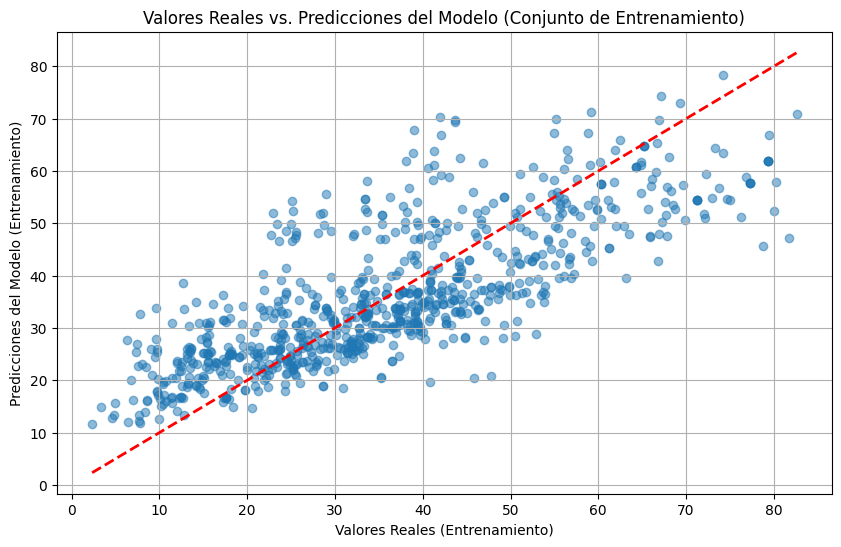

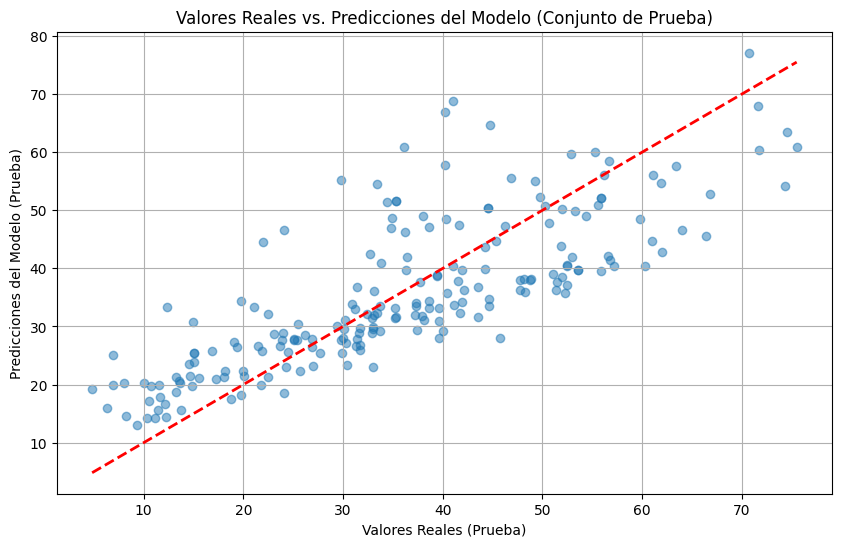

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2) # Add a diagonal line for reference
plt.xlabel("Valores Reales (Entrenamiento)")
plt.ylabel("Predicciones del Modelo (Entrenamiento)")
plt.title("Valores Reales vs. Predicciones del Modelo (Conjunto de Entrenamiento)")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2) # Add a diagonal line for reference
plt.xlabel("Valores Reales (Prueba)")
plt.ylabel("Predicciones del Modelo (Prueba)")
plt.title("Valores Reales vs. Predicciones del Modelo (Conjunto de Prueba)")
plt.grid(True)
plt.show()

**Estos gráficos muestran la relación entre los valores reales de la resistencia a la compresión del concreto y los valores predichos por el modelo de regresión lineal.**

* **Distribución de los puntos:**
    
Observamos que los puntos en ambos gráficos tienden a seguir la dirección de la línea roja (que representa la situación ideal donde los valores predichos son exactamente iguales a los valores reales). Esto indica que hay una **correlación positiva** entre los valores reales y las predicciones del modelo, lo cual es un buen signo para un modelo de regresión. A medida que los valores reales aumentan, las predicciones del modelo también tienden a aumentar.

Sin embargo, hay una **dispersión considerable** de los puntos alrededor de la línea y  esto representa los errores de predicción del modelo. 😓

En el conjunto de **entrenamiento** y en el conjunto de **prueba**, la dispersión es similar, reforzando la conclusión de que el modelo no parece estar sufriendo de sobreajuste significativo.

**En resumen:**

Los gráficos visualmente confirman que el modelo lineal tiene cierta capacidad predictiva, pero también muestran que hay margen de mejora al haber una dispersión notable alrededor de la línea de predicción perfecta. Son una buena representación visual de las métricas de error (RMSE y MAE) calculadas previamente


## 5. **Importancia de Variables**  
   - Analicen los **coeficientes** del modelo:  
     - Valores absolutos altos → mayor impacto en el target.  
     - Signo: Relación positiva/negativa con el target.  
   - Comparen la magnitud de los coeficientes **escalados** (si usaron features en distintas unidades).  
   - **5.1. Opcional**:
     Otra forma es "desordenar" un feature y ver cómo empeora el modelo. Si al desordenarlo el error aumenta mucho, ese feature era importante. Usen métodos como:  
     - **Permutation Importance** (de sklearn) para validar importancia. Más info en https://scikit-learn.org/stable/modules/permutation_importance.html



## Resolución:

In [25]:
display(coefficients_df)

,Feature,Coefficient
0,Cement (component 1)(kg in a m^3 mixture),12.786504
1,Blast Furnace Slag (component 2)(kg in a m^3 m...,9.432883
2,Fly Ash (component 3)(kg in a m^3 mixture),5.255609
3,Water (component 4)(kg in a m^3 mixture),-2.892085
4,Superplasticizer (component 5)(kg in a m^3 mix...,1.841103
5,Coarse Aggregate (component 6)(kg in a m^3 mi...,1.400255
6,Fine Aggregate (component 7)(kg in a m^3 mixture),1.947380
7,Age (day),7.037787


Los coeficientes nos indican la magnitud y la dirección de la relación lineal entre cada característica escalada y la resistencia a la compresión del concreto (el target), manteniendo las otras características constantes.

* Variables más importantes:

Las variables con los mayores valores absolutos en sus coeficientes son las que tienen un mayor impacto en la predicción del target. En este caso, las características con los coeficientes de mayor magnitud son:
* * Cement (component 1),
* * Blast Furnace Slag (component 2)
* * Age (day).

Esto sugiere que la cantidad de cemento y la edad del concreto son los factores más influyentes en la resistencia a la compresión del concreto según este modelo.

* Variables menos importantes:

Las variables con los menores valores absolutos en sus coeficientes son las que tienen un menor impacto en la predicción. Observando la tabla:
* * Coarse Aggregate (component 6) y
* * Superplasticizer (component 5)

Tienen los coeficientes de menor magnitud, lo que indica que su influencia lineal en la resistencia a la compresión del concreto es menor en comparación con las demás variables.

* Dirección de la relación:

Los coeficientes positivos (como los de Cement, Blast Furnace Slag, Fly Ash, Superplasticizer, Coarse Aggregate, y Fine Aggregate) indican que un aumento en la cantidad de estas variables asocia un aumento en la resistencia a la compresión del concreto. Por otro lado el coeficiente negativo de la variable "Water" indica que un aumento en la cantidad del agua está vinculado con una disminución en la resistencia a la compresión del concreto.



## 6. **Reflexión**  
   - ¿Cuáles variables son más importantes según el modelo? ¿Coincide con su análisis exploratorio?  
   - ¿El modelo tiene buen rendimiento (R² alto, MSE bajo)? Si no, ¿a qué podría deberse?  



## Resolución:

Basándonos en el análisis de los coeficientes escalados de nuestro modelo de Regresión Lineal:

*   **Variables Más Importantes**: Las variables con los mayores valores absolutos en sus coeficientes son **Cement (component 1)** , **Blast Furnace Slag** y **Age (day)**. Esto sugiere que la cantidad de cemento, la escoria del horno y la edad del concreto son los factores más influyentes en su resistencia a la compresión del concreto. **Coincide parcialmente** con el análisis exploratorio del principio del notebook. Allí los scatter plots mostraron una tendencia positiva clara entre "Cement" y "Age" con la resistencia a la compresión del concreto.


*   **Conclusión del Rendimiento**: Un R² de 0.63 sugiere que el modelo lineal captura una parte significativa de la relación entre las variables de entrada y la resistencia a la compresión del concreto, pero también indica que hay una variabilidad considerable que no está siendo explicada por el modelo lineal. El rendimiento en el conjunto de prueba es ligeramente mejor que en el de entrenamiento (mayor R² y menor RMSE/MAE), lo que sugiere que el modelo no está sufriendo de sobreajuste (overfitting) significativo.

Los errores del modelo pueden estar ligados a que puede haber otras variables no incluidas en el dataset que influyan en la resistencia del concreto; o que existan relaciones no lineales que son incomprendidas por el modelo de regresión lineal y se queda corto, lo que sugiere utilizar un modelo predictivo más robusto.


**En resumen:**

El modelo lineal proporciona una primera aproximación útil para predecir la resistencia a la compresión del concreto y destaca la importancia clave del cemento, la escoria y la edad. Sin embargo, para obtener predicciones más precisas, podría ser necesario explorar modelos más complejos.


## **Bonus**:  
- Prueben eliminar variables "poco importantes" y reentrenar el modelo. ¿Mejora el rendimiento?  

In [26]:
# Quita de las features menos importantes
features_reduced = features.drop(['Coarse Aggregate  (component 6)(kg in a m^3 mixture)','Superplasticizer (component 5)(kg in a m^3 mixture)','Fine Aggregate (component 7)(kg in a m^3 mixture)'])
X_reduced = df[features_reduced]

# División de los conjuntos
X_train_reduced, X_test_reduced, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Escalado
scaler_reduced = StandardScaler()
X_train_scaled_reduced = scaler_reduced.fit_transform(X_train_reduced)
X_test_scaled_reduced = scaler_reduced.transform(X_test_reduced)

# Inicialización y entrenamiento
model_reduced = LinearRegression()
model_reduced.fit(X_train_scaled_reduced, y_train)

# Precicciones
y_train_pred_reduced = model_reduced.predict(X_train_scaled_reduced)
y_test_pred_reduced = model_reduced.predict(X_test_scaled_reduced)

# Evaluación de entrenamiento
mse_train_reduced = mean_squared_error(y_train, y_train_pred_reduced)
rmse_train_reduced = np.sqrt(mse_train_reduced)
mae_train_reduced = mean_absolute_error(y_train, y_train_pred_reduced)
r2_train_reduced = r2_score(y_train, y_train_pred_reduced)

print("Evaluación del conjunto de entrenamiento (con features 'Coarse Aggregate', 'Superplasticizer', and 'Fine Aggregate' eliminadas):")
print(f"RMSE: {rmse_train_reduced:.2f}")
print(f"MAE: {mae_train_reduced:.2f}")
print(f"R-squared: {r2_train_reduced:.2f}")

# Evaluación de prueba
mse_test_reduced = mean_squared_error(y_test, y_test_pred_reduced)
rmse_test_reduced = np.sqrt(mse_test_reduced)
mae_test_reduced = mean_absolute_error(y_test, y_test_pred_reduced)
r2_test_reduced = r2_score(y_test, y_test_pred_reduced)

print("\nEvaluación del conjunto de prueba (con features 'Coarse Aggregate', 'Superplasticizer', and 'Fine Aggregate' eliminadas):")
print(f"RMSE: {rmse_test_reduced:.2f}")
print(f"MAE: {mae_test_reduced:.2f}")
print(f"R-squared: {r2_test_reduced:.2f}")

# Comparación con el modelo original
print("\nComparación con el modelo original:")
print("Modelo Original (Conjunto de Prueba):")
print(f"RMSE: {rmse_test:.2f}")
print(f"MAE: {mae_test:.2f}")
print(f"R-squared: {r2_test:.2f}")

Evaluación del conjunto de entrenamiento (con features 'Coarse Aggregate', 'Superplasticizer', and 'Fine Aggregate' eliminadas):
RMSE: 10.60
MAE: 8.42
R-squared: 0.60

Evaluación del conjunto de prueba (con features 'Coarse Aggregate', 'Superplasticizer', and 'Fine Aggregate' eliminadas):
RMSE: 9.76
MAE: 7.70
R-squared: 0.63

Comparación con el modelo original:
Modelo Original (Conjunto de Prueba):
RMSE: 9.80
MAE: 7.75
R-squared: 0.63


**Análisis Bonus:**


Entrenado un nuevo modelo de regresión lineal, tras la eliminación de las variables que el análisis de coeficientes sugirió que eran menos importantes: 'Coarse Aggregate', 'Superplasticizer', y 'Fine Aggregate'.

**Conclusión Bonus:**

Eliminar las variables con los coeficientes lineales más bajos no resultó en una disminución significativa del rendimiento del modelo de regresión lineal en el conjunto de prueba. De hecho, las métricas (R², RMSE, MAE) son muy similares, e incluso particularmente mejores en el modelo reducido.

Esto podría sugerir que en algunos casos, eliminar features con baja importancia lineal (según los coeficientes) puede simplificar el modelo sin sacrificar el rendimiento en sí mismo, o incluso puede mejorarlo un poco. Es bueno para entender el impacto de las variables en el modelo.


---

### **Tips**:  
- Si el R² es muy bajo, revisen si hay relaciones no lineales (y consideren transformar features).  
- Documenten cada paso: ¡la trazabilidad es clave en ciencia de datos!  
